In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from  sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

In [2]:
original_df = pd.DataFrame(pd.read_excel('Online Retail.xlsx'))
original_df.dropna(inplace = True)
original_df.reset_index(inplace = True,drop = True)
original_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
initial_df  = original_df.copy()
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [4]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    
        initial_df[category] = le.fit_transform(initial_df[category].astype(str))
        
        
initial_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,0,2.55,4048,35
1,0,2649,3724,6,0,3.39,4048,35
2,0,2855,861,8,0,2.75,4048,35
3,0,2803,1813,6,0,3.39,4048,35
4,0,2802,2776,6,0,3.39,4048,35


In [5]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,10895.552697,3.460471,2176.377102,32.827731
std,5552.295845,844.054584,1089.177346,248.693370,5975.017014,69.315162,1255.543861,6.738565
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,0.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,5635.000000,1.250000,1196.000000,35.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,11447.000000,1.950000,2073.000000,35.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,16148.000000,3.750000,3287.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,4371.000000,36.000000


In [6]:
initial_df.drop(axis=1,columns='InvoiceDate',inplace=True)
wrong_data = initial_df[initial_df['Quantity']<0].index
wrong_data
initial_df.drop(index=wrong_data,axis=0,inplace=True)
initial_df.reset_index(drop=True,inplace=True)
initial_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,0,3249,3716,6,2.55,4048,35
1,0,2649,3724,6,3.39,4048,35
2,0,2855,861,8,2.75,4048,35
3,0,2803,1813,6,3.39,4048,35
4,0,2802,2776,6,3.39,4048,35


In [7]:
scaler = MinMaxScaler(feature_range=(1,5))
normalized_array = scaler.fit_transform(initial_df)
normalized_df = pd.DataFrame(normalized_array,columns=initial_df.columns)
normalized_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1.0,4.528645,4.816175,1.000247,1.001253,4.704415,4.888889
1,1.0,3.877002,4.824390,1.000247,1.001665,4.704415,4.888889
2,1.0,4.100733,1.884211,1.000346,1.001351,4.704415,4.888889
3,1.0,4.044257,2.861874,1.000247,1.001665,4.704415,4.888889
4,1.0,4.043171,3.850834,1.000247,1.001665,4.704415,4.888889


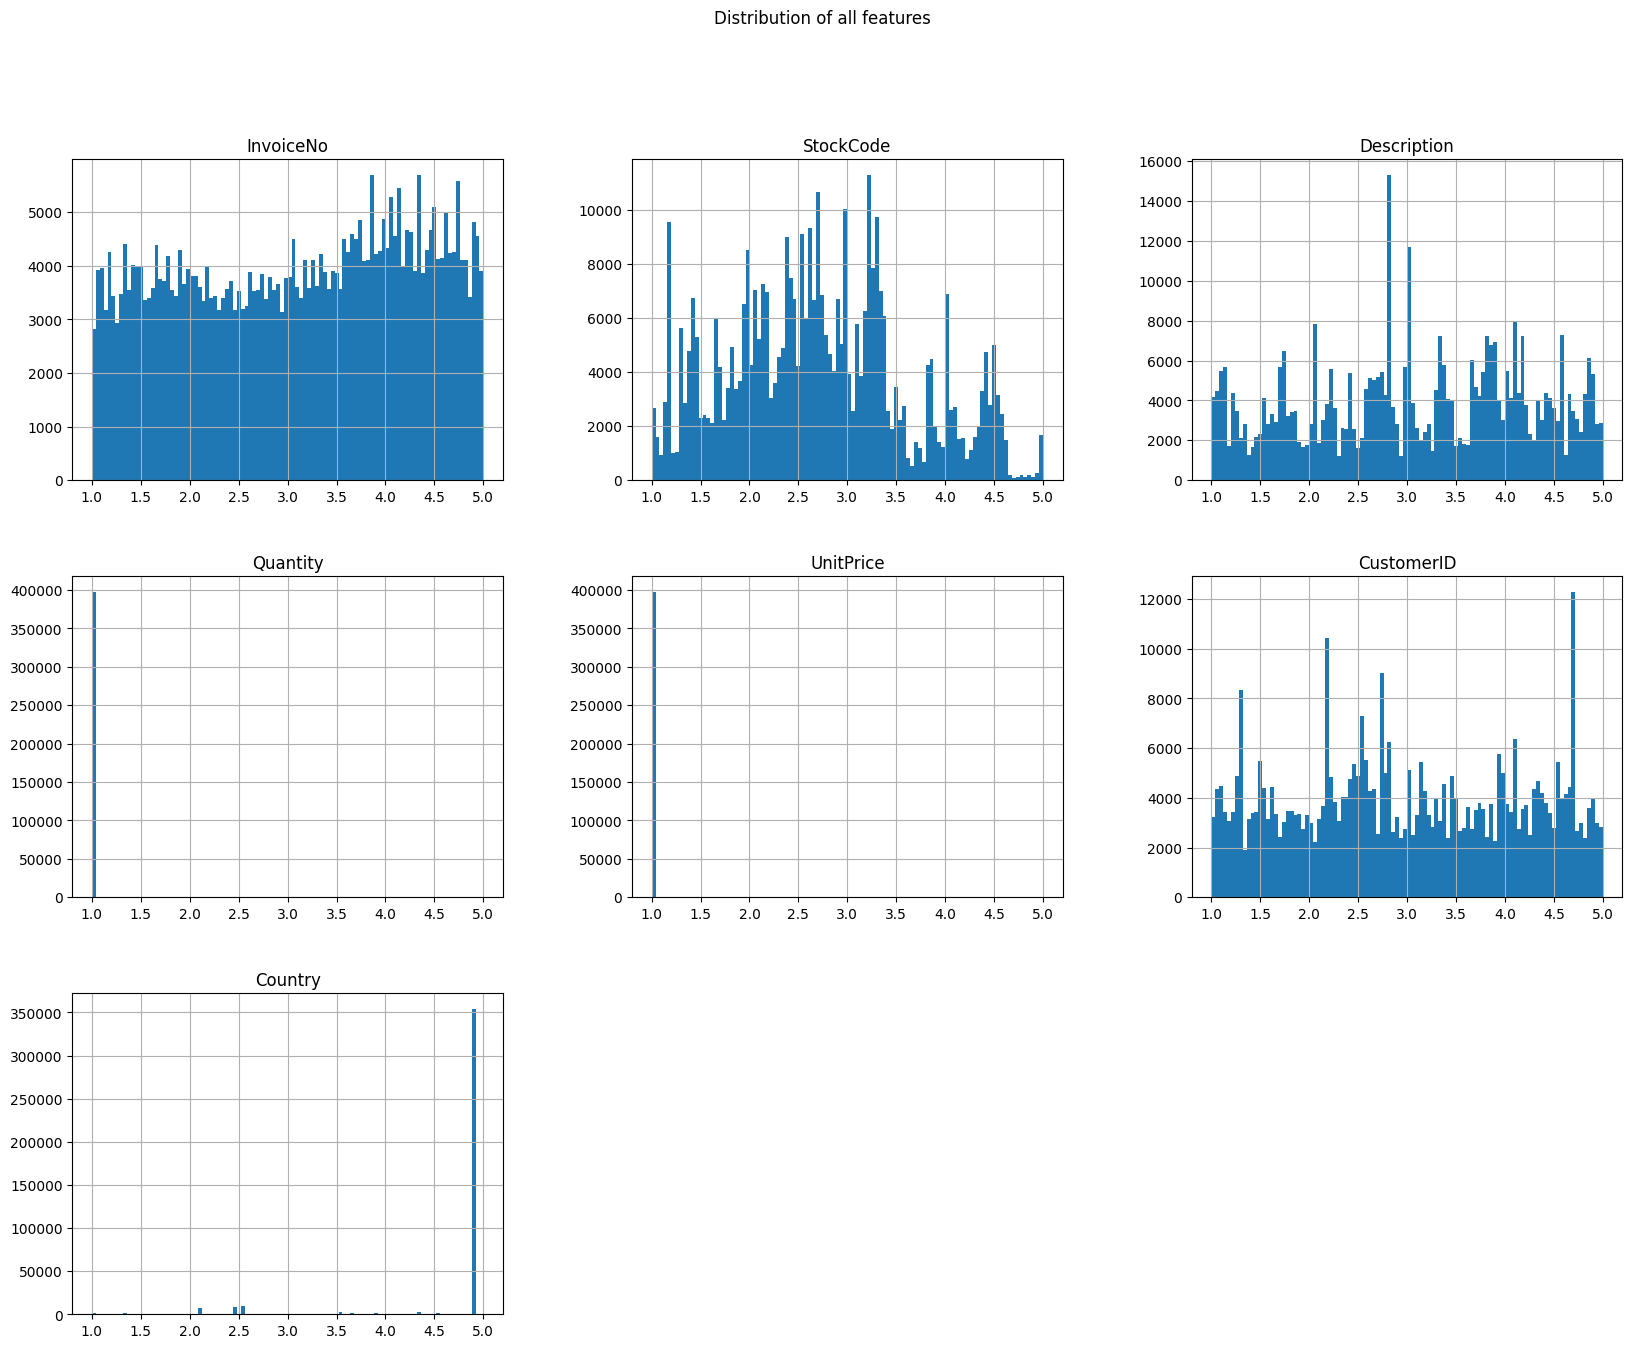

In [8]:
normalized_df.hist(bins=100,figsize=(20,15))
plt.suptitle('Distribution of all features')
plt.show()

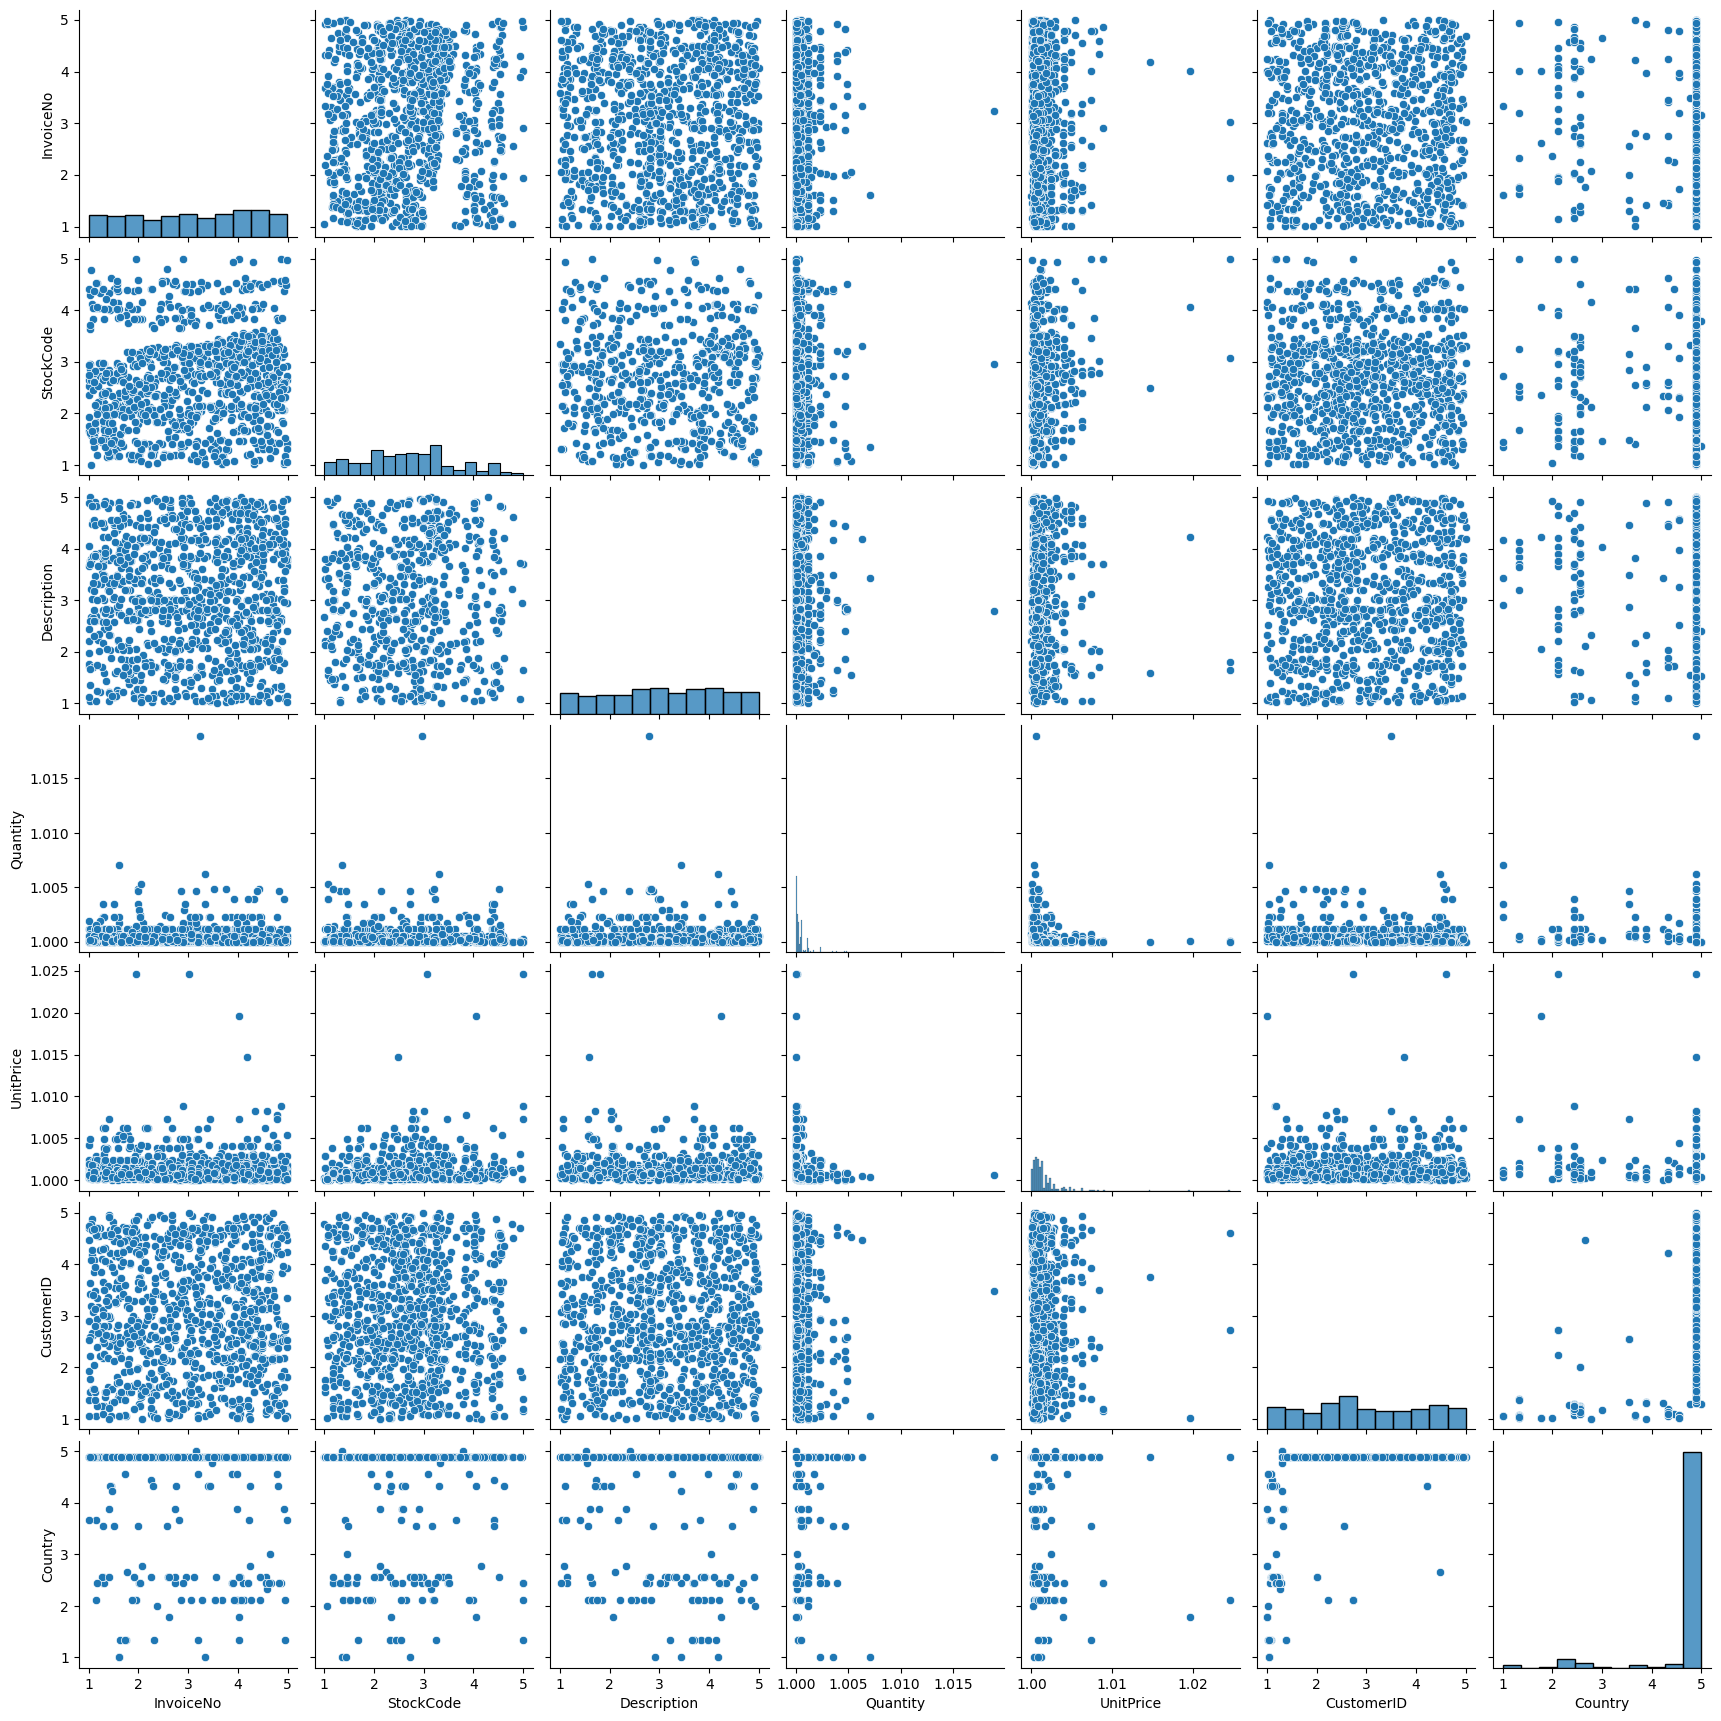

In [9]:
sns.pairplot(normalized_df.sample(1000))
plt.show()

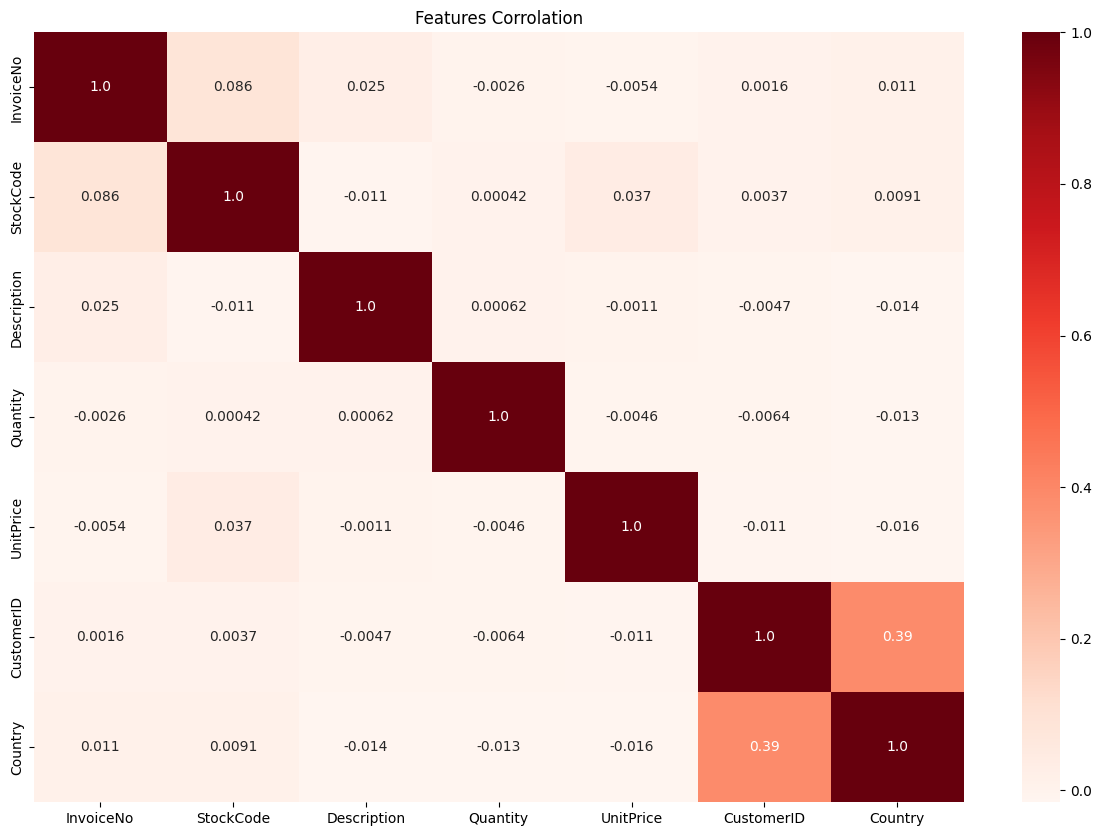

In [10]:
corr = normalized_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True,cmap = plt.cm.Reds, fmt = '0.2')
plt.title('Features Corrolation')
plt.show()

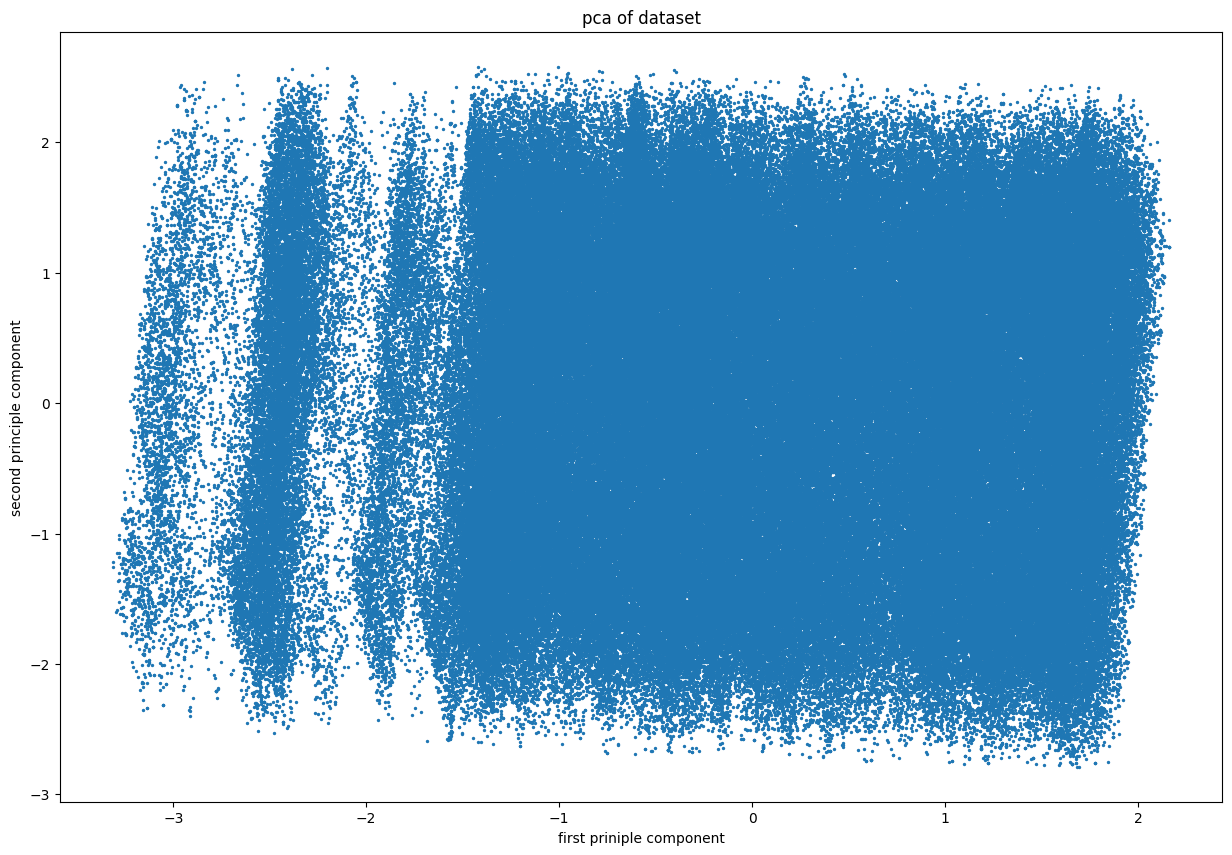

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

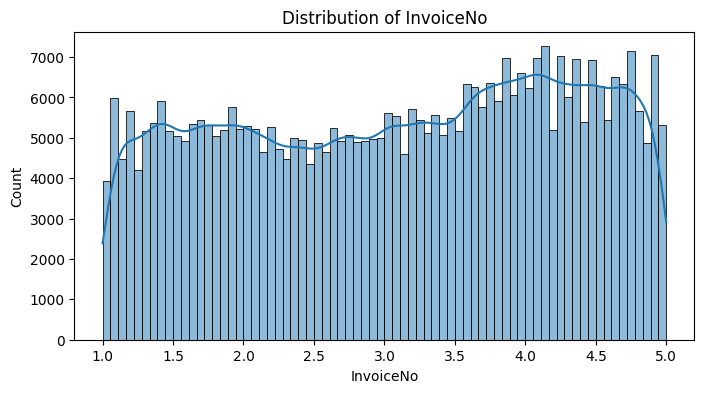

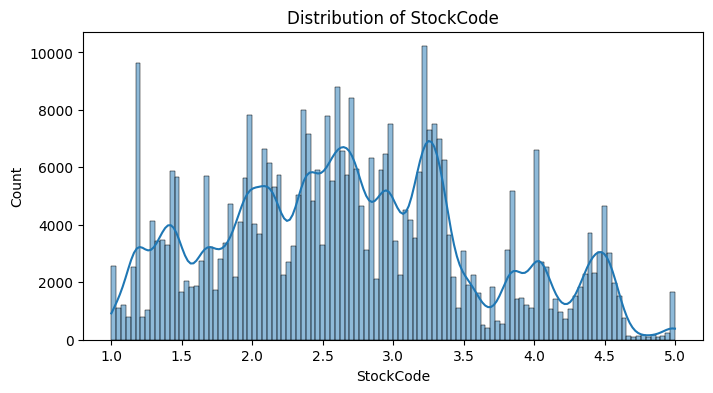

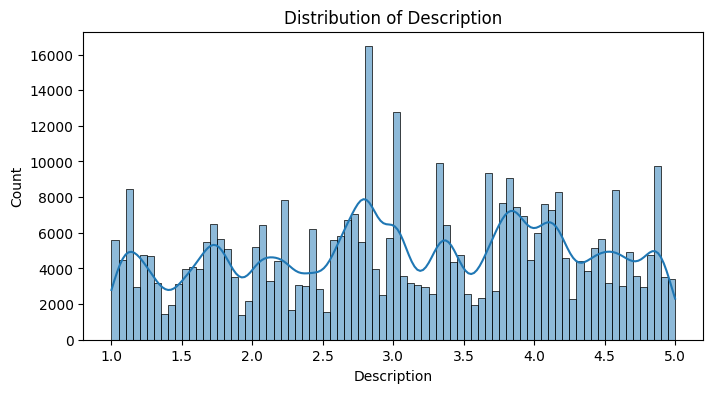

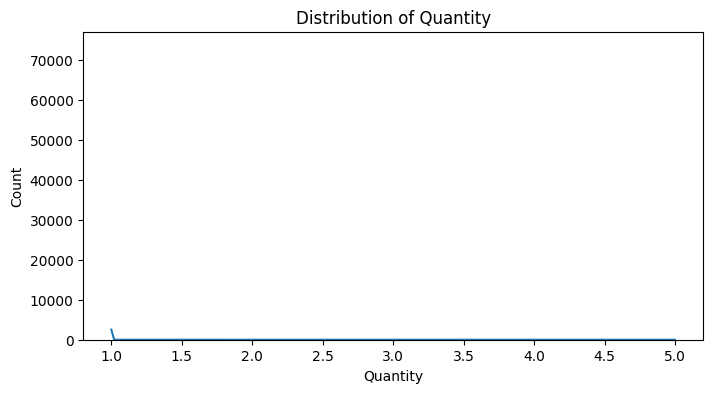

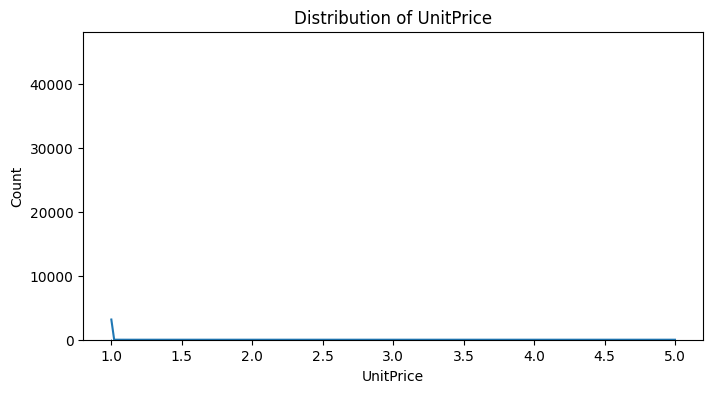

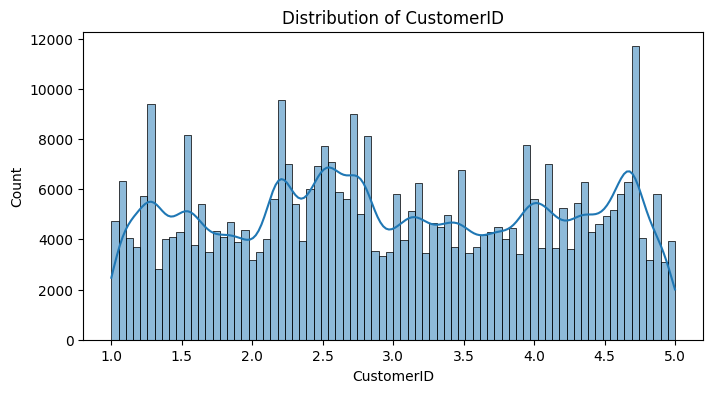

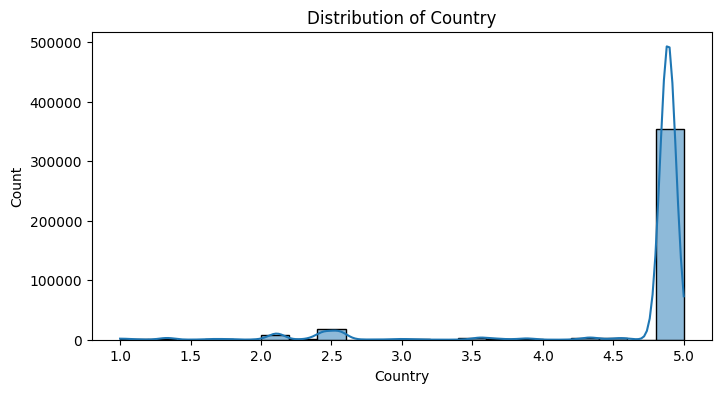

In [12]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(normalized_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

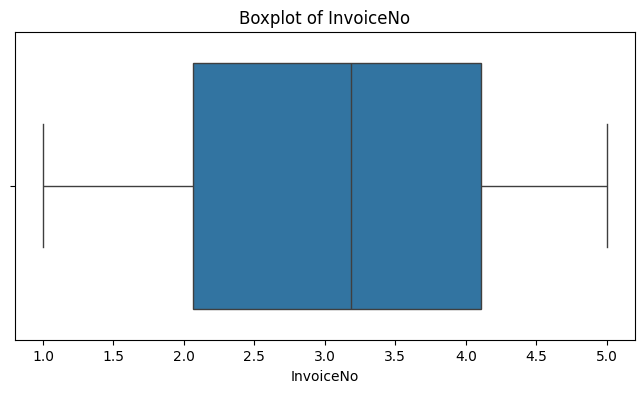

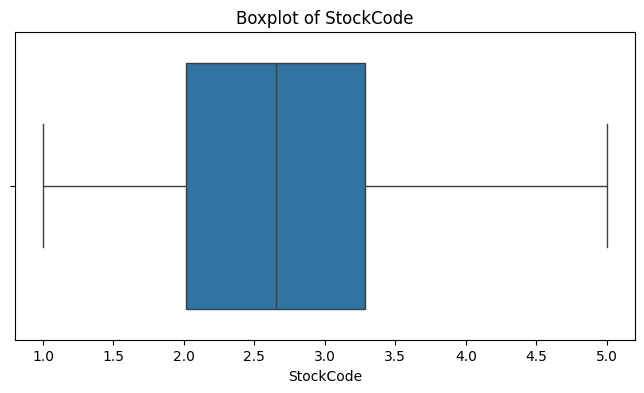

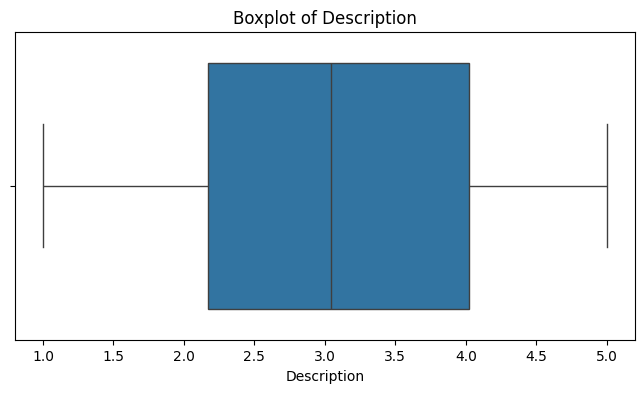

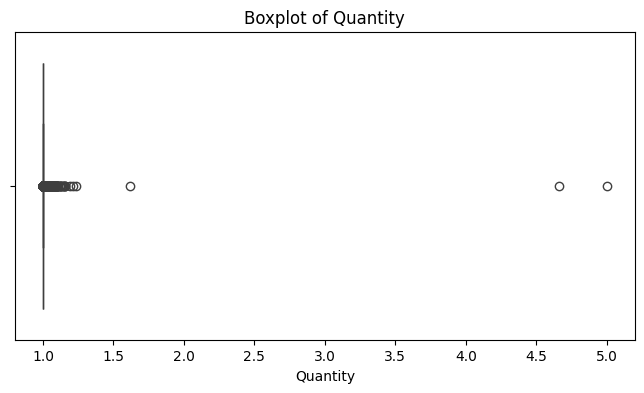

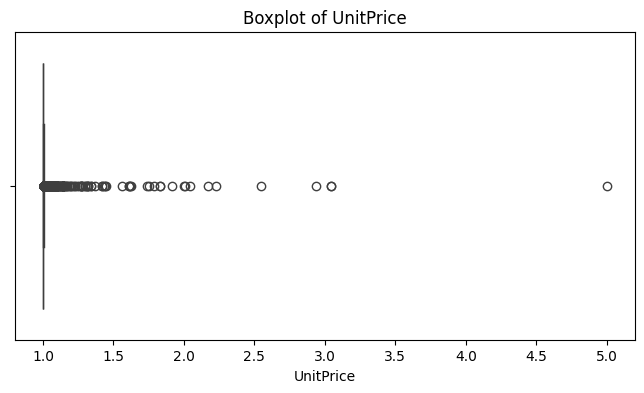

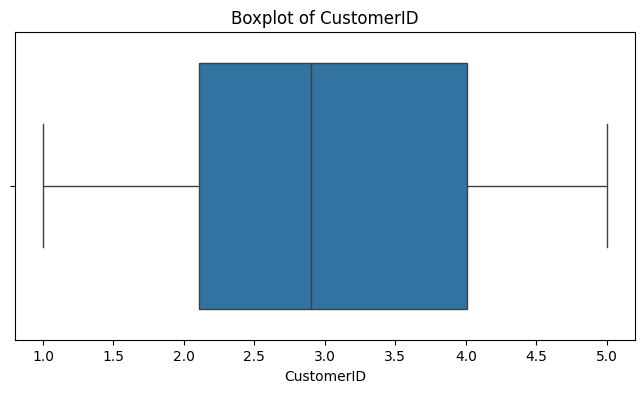

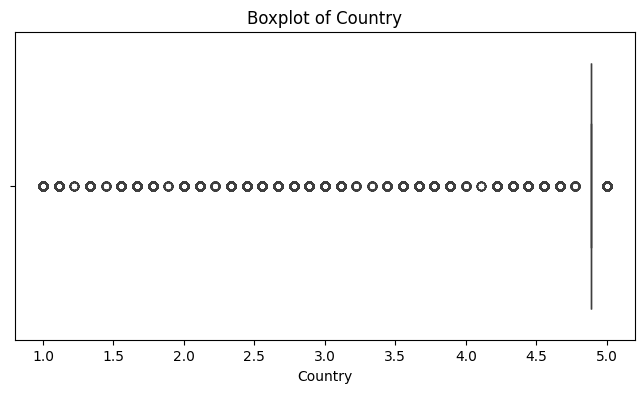

In [13]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=normalized_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

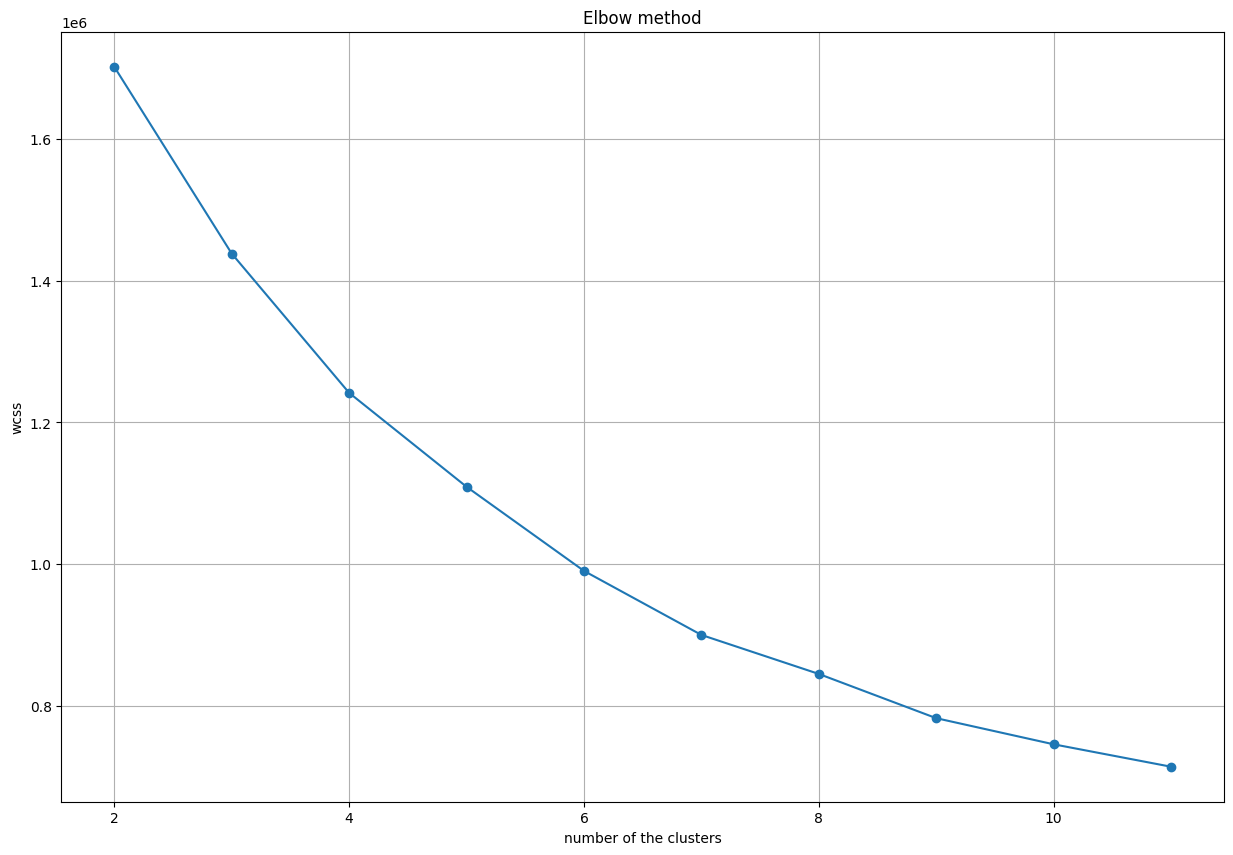

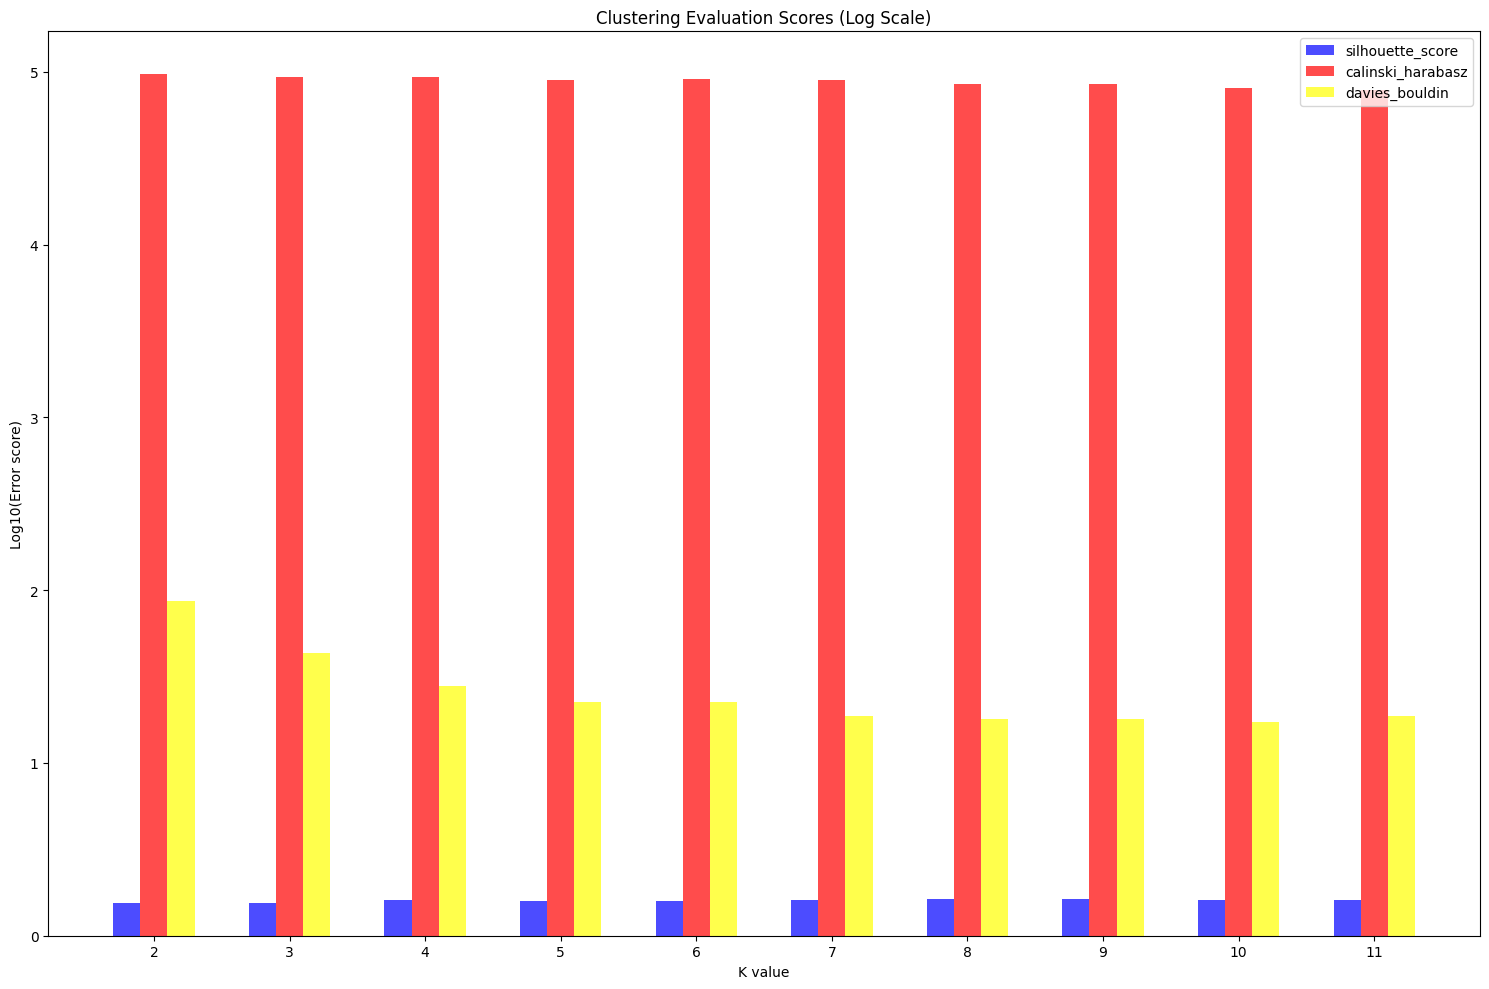

,k_value,silhouette_score,calinski_harabasz,davies_bouldin
0,2,0.189486,96647.674422,1.934649
1,3,0.187685,93621.200140,1.633706
2,4,0.205548,93273.960248,1.446002
3,5,0.202812,90193.168180,1.355332
4,6,0.201522,90326.174631,1.355201
5,7,0.209468,89478.005193,1.269758
6,8,0.213311,85387.390988,1.254392
7,9,0.210281,84631.791568,1.254844
8,10,0.208073,81127.709863,1.237724
9,11,0.208285,78007.812781,1.269594


In [14]:
wcss = []
si_score,ca_score,da_score = [],[],[]
k_value = [i for i in range (2,12)]

for k in range(2,12):
    
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(normalized_df)
    labels = km.predict(normalized_df)
    
    #evaluation process
    
    si_score.append(silhouette_score(normalized_df,labels,sample_size=30000))
    ca_score.append(calinski_harabasz_score(normalized_df,labels))
    da_score.append(davies_bouldin_score(normalized_df,labels))
    wcss.append(km.inertia_)
    
    
    # ploting process
    
plt.figure(figsize=(15,10))
plt.plot(range(2,12),wcss,marker = 'o')
plt.xlabel('number of the clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid()
plt.show()


plt.figure(figsize=(15,10))
bar_width = 0.2
index = np.arange(len(k_value))
plt.bar(index,si_score ,bar_width,label = 'silhouette_score',color = 'blue',alpha = 0.7)
plt.bar(index + bar_width ,np.log10(ca_score),bar_width,label = 'calinski_harabasz',color = 'red',alpha = 0.7)
plt.bar(index + 2*bar_width ,da_score,bar_width,label = 'davies_bouldin',color = 'yellow',alpha = 0.7)

plt.xlabel('K value')
plt.ylabel('Log10(Error score)')
plt.title('Clustering Evaluation Scores (Log Scale)')
plt.xticks(index+bar_width,k_value)
plt.legend()
plt.tight_layout()
plt.show()

error_dic = {'k_value':k_value,
             'silhouette_score':si_score,
             'calinski_harabasz':ca_score,
             'davies_bouldin':da_score}

error_df = pd.DataFrame(error_dic)
error_df

In [15]:
km = KMeans(n_clusters=5,random_state=0)
km.fit(normalized_df)
labels = km.predict(normalized_df)

C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_11412\1543746537.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


C:\Users\HP FOLIO\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


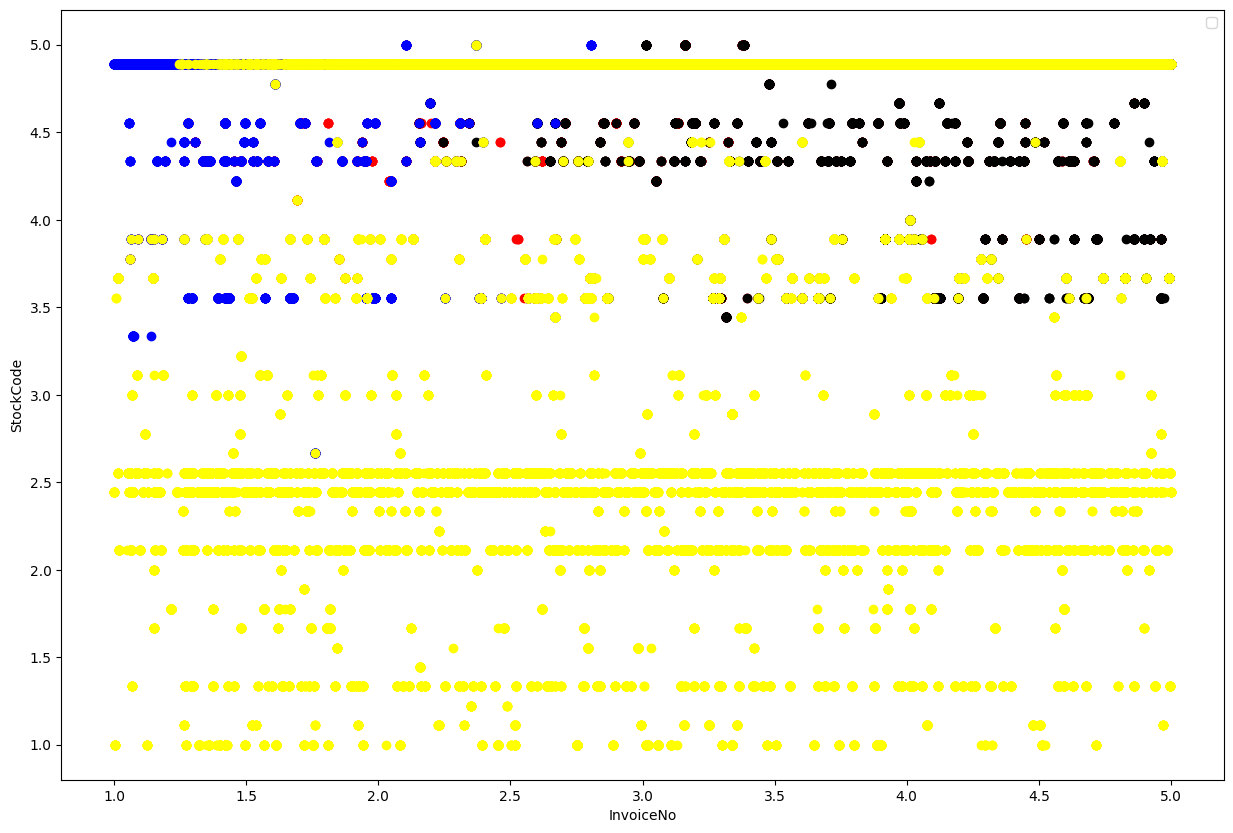

In [16]:
normalized_df['K-mean-cluster'] = labels
df_1 = normalized_df[normalized_df['K-mean-cluster'] == 0]
df_2 = normalized_df[normalized_df['K-mean-cluster'] == 1]
df_3 = normalized_df[normalized_df['K-mean-cluster'] == 2]
df_4 = normalized_df[normalized_df['K-mean-cluster'] == 3]
df_5 = normalized_df[normalized_df['K-mean-cluster'] == 4]

plt.figure(figsize=(15,10))
plt.scatter(df_1.InvoiceNo,df_1.Country,color = 'red')
plt.scatter(df_2.InvoiceNo,df_2.Country,color = 'black')
plt.scatter(df_3.InvoiceNo,df_3.Country,color = 'blue')
plt.scatter(df_4.InvoiceNo,df_4.Country,color = 'yellow')
plt.scatter(df_5.InvoiceNo,df_5.Country,color = 'yellow')


plt.xlabel('InvoiceNo')
plt.ylabel('StockCode')
plt.legend()

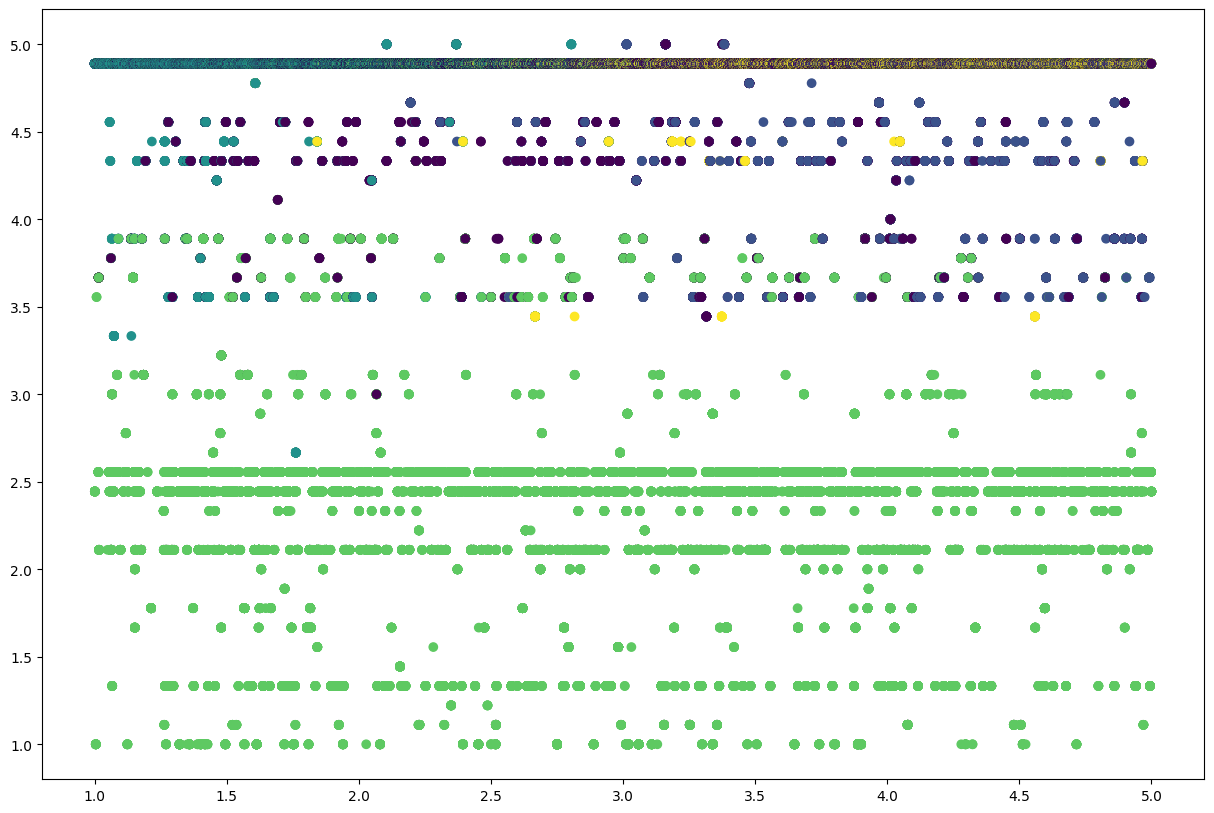

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(normalized_df.InvoiceNo,normalized_df.Country,c = normalized_df['K-mean-cluster'])

In [18]:
for i in range(2,6) :

    pca = PCA(n_components=i,random_state=0)
    pca_result = pca.fit_transform(normalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance)}')

2 component cover 0.5311699053654398
3 component cover 0.7020013516329295
4 component cover 0.8539466141153936
5 component cover 0.9657108561062469


the explained variance result : [0.34274224 0.18842766 0.17083145 0.15194526]


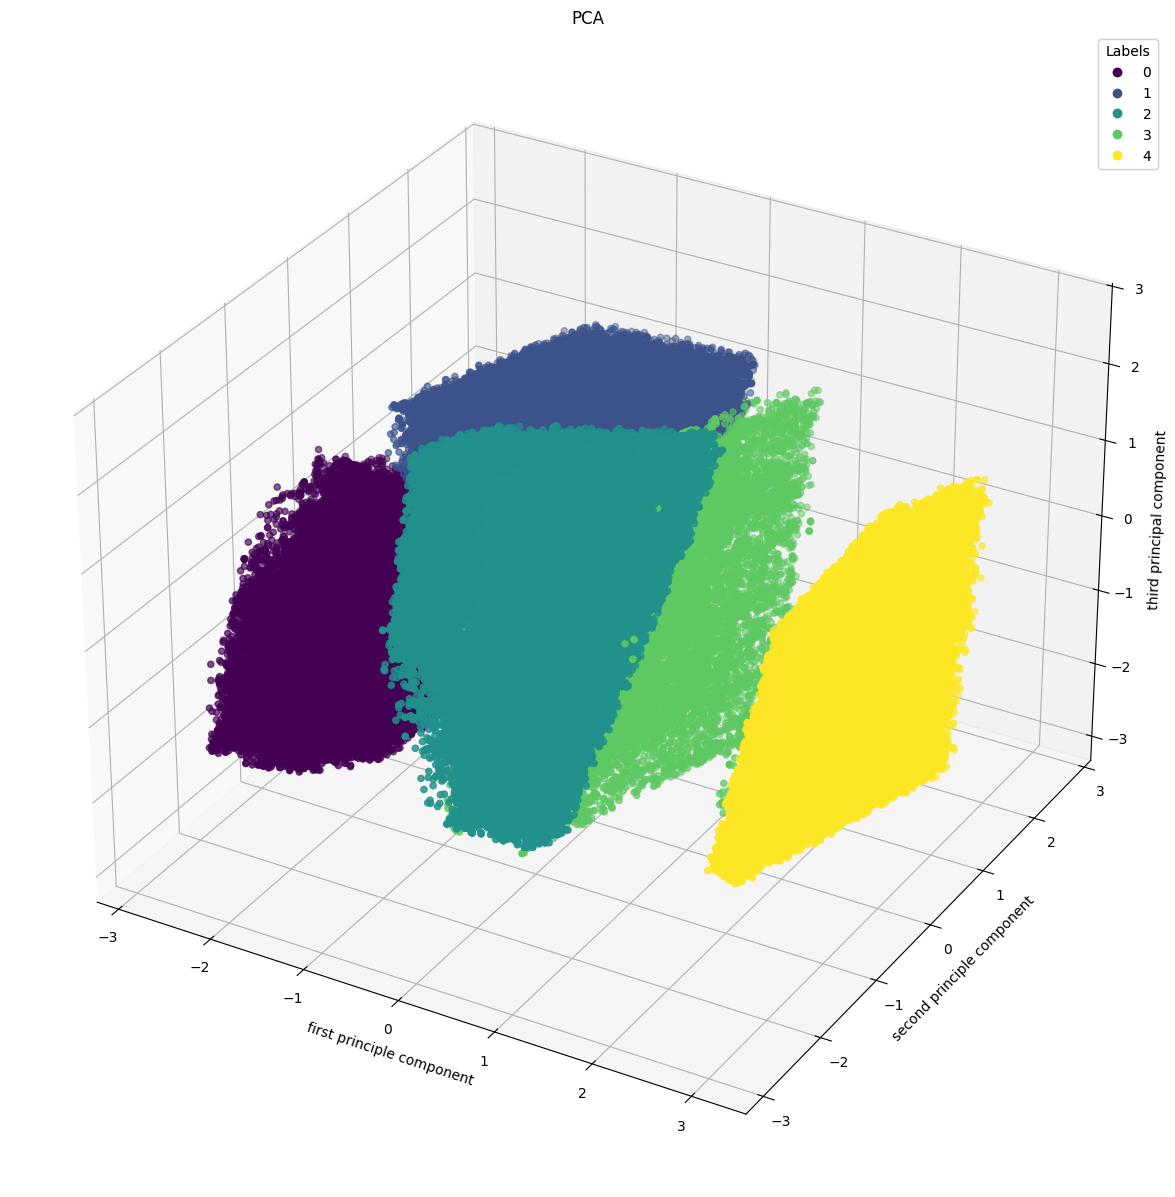

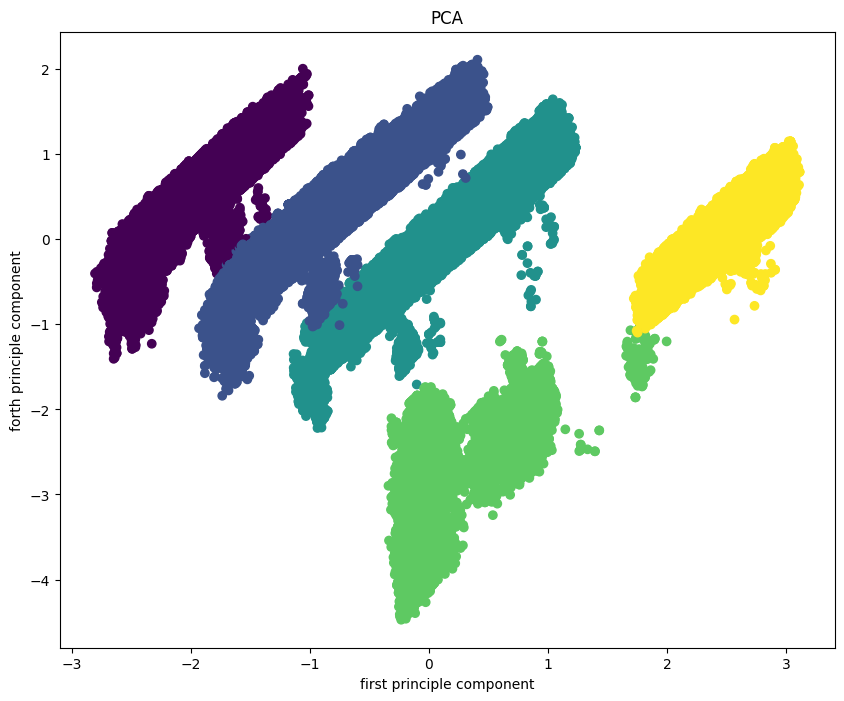

In [19]:
pca = PCA(n_components=4,random_state=0)
pca_result = pca.fit_transform(normalized_df)
print(f'the explained variance result : {pca.explained_variance_ratio_}')

plt.figure(figsize=(25,15))
ax = plt.axes(projection = '3d')

scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('first principle component')
plt.ylabel('second principle component')
ax.set_zlabel('third principal component')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,3],c=labels)
plt.xlabel('first principle component')
plt.ylabel('forth principle component')
plt.title('PCA')
plt.show()

In [20]:
sample_data = normalized_df.sample(5000)
sample_data.reset_index(drop=True,inplace=True)
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster
0,4.816995,1.837361,2.698588,1.000000,1.003070,3.638298,4.888889,4
1,3.001187,1.627749,1.017458,1.000543,1.000614,1.742164,4.888889,0
2,1.612679,2.481401,4.084981,1.000148,1.002432,3.203615,4.888889,2
3,1.231346,1.809123,2.106033,1.000741,1.001253,4.166323,4.888889,2
4,4.877205,1.822156,3.786136,1.000247,1.001449,1.765042,4.888889,1
...,...,...,...,...,...,...,...,...
4995,4.090585,1.866685,1.792811,1.000444,1.000206,2.598719,4.888889,0
4996,4.944753,2.714906,1.146855,1.001136,1.001842,1.174788,2.444444,3
4997,4.889938,2.536791,3.650578,1.000000,1.000811,4.766644,4.888889,4
4998,4.241004,2.149063,2.651348,1.000247,1.000093,3.167010,4.888889,4


In [21]:
bandwith = estimate_bandwidth(sample_data,quantile=0.2,random_state=0)
bandwith

np.float64(2.6839938184981333)

In [22]:
ms = MeanShift(bandwidth=2.5)
ms.fit(sample_data)
ms_label = ms.labels_
ms_center = ms.cluster_centers_
np.unique(ms_label)

array([0, 1, 2])

In [23]:
sample_data['Mean-shift-cluster'] = ms_label
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster,Mean-shift-cluster
0,4.816995,1.837361,2.698588,1.000000,1.003070,3.638298,4.888889,4,1
1,3.001187,1.627749,1.017458,1.000543,1.000614,1.742164,4.888889,0,0
2,1.612679,2.481401,4.084981,1.000148,1.002432,3.203615,4.888889,2,0
3,1.231346,1.809123,2.106033,1.000741,1.001253,4.166323,4.888889,2,0
4,4.877205,1.822156,3.786136,1.000247,1.001449,1.765042,4.888889,1,0
...,...,...,...,...,...,...,...,...,...
4995,4.090585,1.866685,1.792811,1.000444,1.000206,2.598719,4.888889,0,0
4996,4.944753,2.714906,1.146855,1.001136,1.001842,1.174788,2.444444,3,2
4997,4.889938,2.536791,3.650578,1.000000,1.000811,4.766644,4.888889,4,1
4998,4.241004,2.149063,2.651348,1.000247,1.000093,3.167010,4.888889,4,1


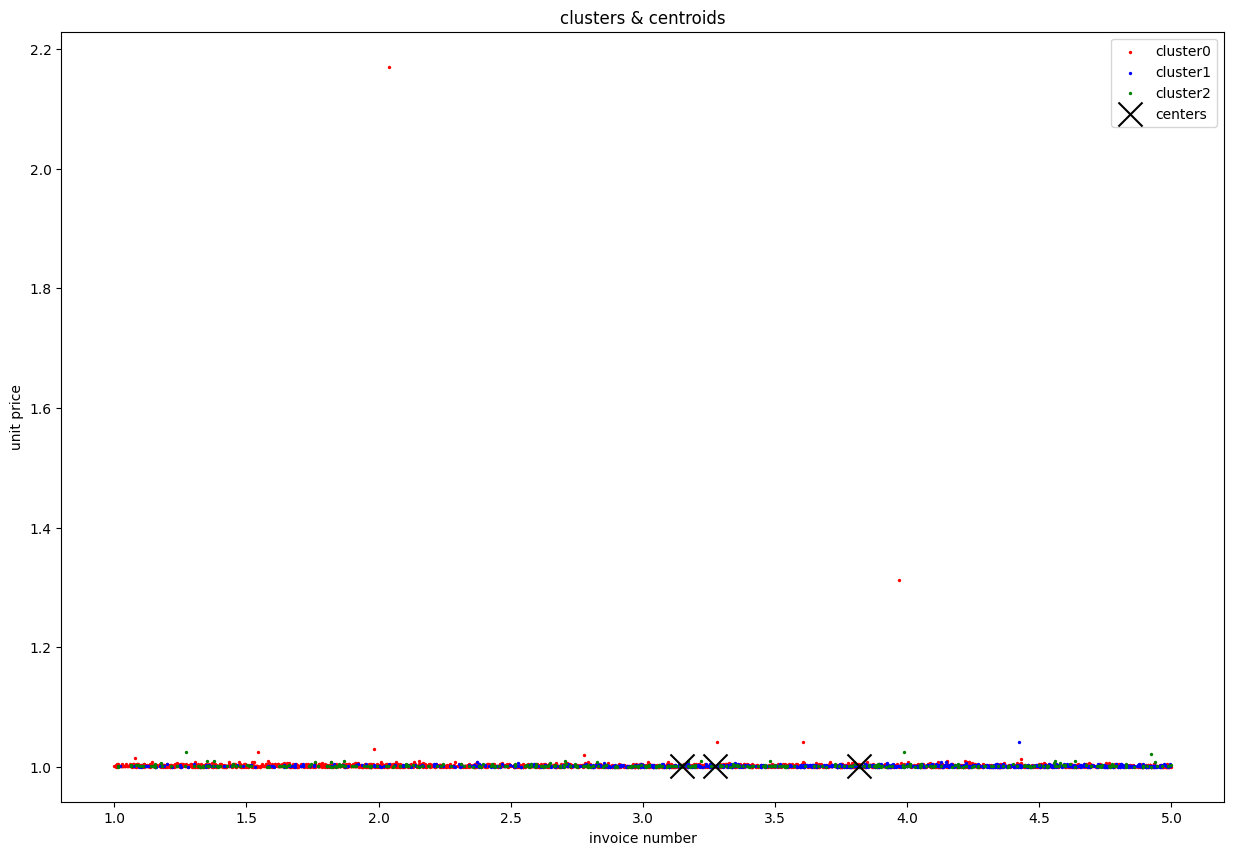

In [24]:
plt.figure(figsize=(15,10))
unique_clusters = np.unique(ms_label)
color_dic = {0:'red',1:'blue',2:'green'}
for i in unique_clusters : 
    df = sample_data[sample_data['Mean-shift-cluster'] == i]
    labels = df['Mean-shift-cluster']
    plt.scatter(df.iloc[:,0],df.iloc[:,4],color = color_dic[i],label = f'cluster{i}',s = 2)

    
plt.scatter(ms_center[:,0],ms_center[:,4],color = 'black', s = 300, marker = 'x',label = 'centers')
plt.xlabel('invoice number')
plt.ylabel('unit price')
plt.title('clusters & centroids')
plt.legend()
plt.show()